## How to estimate the best parameters in the simple linear regression?

In simple linear regression, we aim to find the best-fit line that minimizes the difference between the observed data points and the predictions made by our model. The most common method for finding this best-fit line is the least squares method, which minimizes the sum of the squared residuals.

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$

- where $y_i$ is the observed response
- $x_i$ is the predictor variable
- $\beta_0$ is the intercept
- $\beta_1$ is the slope
- $\epsilon_i$ is the error term, assumed to have mean 0

Our **goal** is to find the estimates of $\beta_0, \beta_1$, denoted as $\hat{\beta_0}, \hat{\beta_1}$, such that the sum of the squared residuals (SSR) is minimized.

The residual for each observation is:
$e_i = y_i - (\beta_0 + \beta_1 x_i)$

$\text{SSR} = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n \left(y_i - (\beta_0 + \beta_1 x_i)\right)^2$

we take partial derivatives of SSR with respect to and set them to zero. This is because the points where the partial derivatives are zero correspond to the local minima, maxima, or saddle points of the function. In the context of SSR, we are looking for a minimum.

#### Partial Derivative with respect to $\beta_0$
$$
\frac{\partial SSR}{\partial \beta_0} = \sum_{i=1}^n -2 (y_i - \beta_0 - \beta_1 x_i) = 0
-2 \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i) = 0
\sum_{i=1}^n y_i - n \beta_0 - \beta_1 \sum_{i=1}^n x_i = 0
\beta_0 = \frac{1}{n} \sum_{i=1}^n y_i - \beta_1 \frac{1}{n} \sum_{i=1}^n x_i
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

#### Partial Derivative with respect to $\beta_1$

$$
\frac{\partial SSR}{\partial \beta_1} = \sum_{i=1}^n -2 x_i (y_i - \beta_0 - \beta_1 x_i) = 0
-2 \sum_{i=1}^n x_i (y_i - \beta_0 - \beta_1 x_i) = 0
\sum_{i=1}^n x_i y_i - \beta_0 \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2 = 0
$$

Substitute $\beta_0 = \bar{y} - \beta_1 \bar{x}$ where we denote the sample means as $\bar{x}$ and $\bar{y}$
(Why? This property ensures that the regression line passes through the centroid of the data points)

$$
\sum_{i=1}^n x_i y_i - (\bar{y} - \beta_1 \bar{x}) \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2 = 0
\sum_{i=1}^n x_i y_i - \bar{y} \sum_{i=1}^n x_i + \beta_1 \bar{x} \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2 = 0
\sum_{i=1}^n x_i y_i - \bar{y} \sum_{i=1}^n x_i = \beta_1 \left( \sum_{i=1}^n x_i^2 - \bar{x} \sum_{i=1}^n x_i \right)
\sum_{i=1}^n x_i y_i - n \bar{x} \bar{y} = \beta_1 \left( \sum_{i=1}^n x_i^2 - n \bar{x}^2 \right)
\beta_1 = \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 }
$$

By comparing the t-statistic to critical values from the t-distribution, we can determine whether to reject or fail to reject the null hypothesis. If the null hypothesis is rejected, it suggests that there is sufficient evidence to conclude that there is a linear relationship between the predictor and response variables.
#### What is the t-distribution? 
t-distribution, also known as Student's t-distribution, is a probability distribution that is similar to the standard normal distribution (z-distribution) but has heavier tails. 

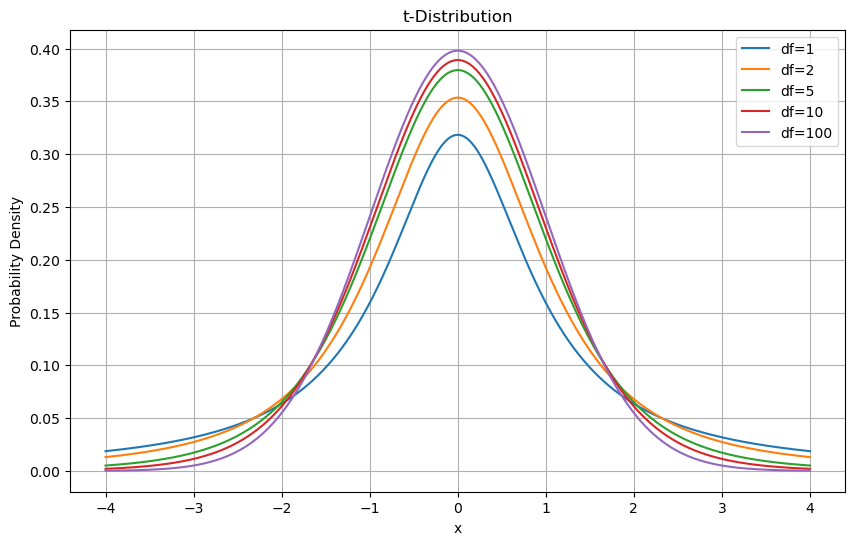

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define a range of x values
x = np.linspace(-4, 4, 1000)

# Define degrees of freedom
df_values = [1, 2, 5, 10, 100]

# Plot the t-distribution for different degrees of freedom
plt.figure(figsize=(10, 6))
for df in df_values:
    # Calculate the probability density function (PDF) for each degree of freedom
    y = t.pdf(x, df)
    # Plot the PDF
    plt.plot(x, y, label=f'df={df}')

# Add labels and legend
plt.title('t-Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


## How to estimate $R^2$

- Total Sum of Squares (TSS) measures the total variability of the dependent variable (y) around its mean:
$\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$
- Residual Sum of Squares (RSS) measures the variability of the dependent variable that is not explained by the regression model:
  $$
  \text{RSS} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
  $$
- $R^2$ is defined as the proportion of total variance in y that is explained by the regression model:
  $$
  R^2 = 1- \frac{\text{RSS}}{\text{TSS}}
  $$